<a href="https://colab.research.google.com/github/Glorc12/desktop-tutorial/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%22%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA_CBYBQ_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отрефакторить опираясь на эту сылку и плюс под два языка https://www.kaggle.com/code/odaymourad/detailed-and-typical-solution-ensemble-modeling

In [ ]:
# Импорт библиотек | Importing the libaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

Ниже предоставлен набор данных пассажиров титаника. Целевая переменная - Survived (выжил ли пассажир во время крушения). |
Below is a dataset of Titanic passengers. The target variable is Survived (whether the passenger survived the crash).

Признаки и их обозначения:

Признак | Обозначение в наборе данных | Знначения |
--- | --- | ---
Номер пассажира | PassengerId |
Выжил ли человек | Survived	| бинарный, 0 = Нет, 1 = Да |
Класс (каюты) | Pclass | категориальный, 1 = 1 класс, 2 = 2 класс, 3 = 3 класс |
Имя | Name | строковый
Пол | Sex | бинарный, male - муж. female - жен.
Возраст | Age | float |
Кол-во родственников | SibSp | кол-во братьев и сестер/супругов на борту Титаника
Дети | Parch | кол-во родителей/детей на борту
Билет | Ticket | номер билета, строковый |
Плата за проезд | Fare | float |
Номер каюты | Cabin | номер кабины, строковый|
Порт отправки | Embarked | категориальный, C = Cherbourg, Q = Queenstown, S = Southampton |

Signs and their designations:

Sign | Designation in the data set | Values |
--- | --- | ---
PassengerNumber | PassengerId | |
Did the person survive | Survived	| binary, 0 = No, 1 = Yes |
Class(cabins) | Pclass | categorical, 1 = first class , 2 = second class , 3 = third class |
Name | Name | str
Gender | Sex | binary, male, female
 | Age | float |
Number of relatives | SibSp | number of siblings/spouses aboard the Titanic
Children | Parch | number of parents/children on board
 | Ticket | number of ticket, str |
 | Fare | float |
 | Cabin | cabin number, str|
Shipping port | Embarked | categorical, C = Cherbourg, Q = Queenstown, S = Southampton |

## Загрузка и подготовка данных
1 ) Importing the data:

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Titanic')
test = pd.read_csv('/content/gdrive/MyDrive/titanic_surv.csv')

In [ ]:
df

2) Иследуем данные

2 ) Discovering the data:

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
# Discovering the features:
# Исследуем фичи, колонки
print('train:', df.columns.values)
print('test:', test.columns.values)

train: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
test: ['Survived']


#### Задание 1

Отобразить основные статистики набора данных.

Display the main statistics of a dataset.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Задание 2

Отобразить информацию о пропусках в данных. И обнаружение типов фичей.

Display information about gaps in the data. And discovering the features types:

In [ ]:
# Пропуски
print("Пропущенные тренировочные данные:\n", df.isnull().sum())
print("\nПропущенные тестовые данные:\n", test.isnull().sum())

# Типы фичей
categorical_features = ['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

print("\nCategorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Пропущенные тренировочные данные:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Пропущенные тестовые данные:
 Survived    0
dtype: int64

Categorical Features: ['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Features: ['Age', 'Fare', 'SibSp', 'Parch']


Features discovering results:

Features of the test data are the same as features of the training data except

for the Survived feature (because it's the target).

Features types:

Categorical:

*   Pclass (ordinal)
*   Name (nominal)
*   Sex (nominal)

Numerical:

*   Age (continuous)
*   Fare (continuous)
*   SibSp (discrete)
*   Parch (discrete)

Mixed:
*   Ticket (numeric and alphanumeric)
*   Cabin (alphanumeric)

Insights: Features types are very important for EDA step.

Особенности обнаружения результатов: Характеристики тестовых данных такие же, как и характеристики обучающих данных, за исключением для функции «Выживший» (потому что это цель). Типы функций: Категориальный: * Pкласс (порядковый) * Имя (номинальное) * Пол (номинальный) Числовой: * Возраст (непрерывно) * Тариф (непрерывный) * СибСп (дискретный) * Парч (дискретный) Смешанный: * Билет (цифровой и буквенно-цифровой) * Кабина (буквенно-цифровая) Выводы: типы функций очень важны для этапа EDA.

#### Задание 3

Визуализировать информацию о пропусках в данных.

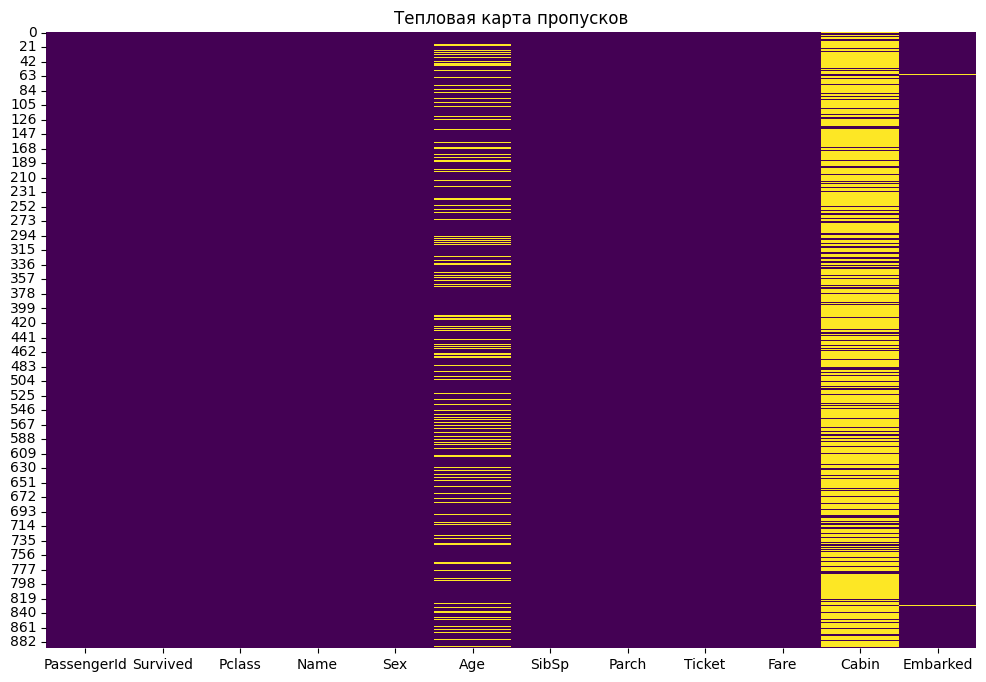

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропусков')
plt.show()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Очистка данных

### Задание 4

Выбросить нерелевантные (для предсказания целевой переменной) колонки и очистить все строки, где есть хотя бы один пропуск в оставшихся колонках. Сохранить и отобразить результат.

In [ ]:
# Удаление нерелевантных колонок
irrelevant_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_cleaned = df.drop(columns=irrelevant_columns)
df_cleaned = df_cleaned.dropna()

print(df_cleaned.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [ ]:
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Кодировка данных


### Задание 5

Выполнить one hot кодировку категориальных колонок, сохранить и отобразить результат.

In [ ]:
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=False)
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


### Стандартизация

#### Задание 6

Выполнить стандартизацию числовых колонок закодированного выше датафрейма по формуле:

$$x_i = \frac{x_i - \mu}{\sigma}$$

Где $\mu$ - среднее, $\sigma$ - стандартное отклонение

In [ ]:
# Стандартизация числовых колонок
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.527669,0.522511,-0.506787,-0.516380,False,True,False,False,True
1,1,1,0.577094,0.522511,-0.506787,0.694046,True,False,True,False,False
2,1,3,-0.251478,-0.552714,-0.506787,-0.503620,True,False,False,False,True
3,1,1,0.369951,0.522511,-0.506787,0.350326,True,False,False,False,True
4,0,3,0.369951,-0.552714,-0.506787,-0.501257,False,True,False,False,True


## Визуализации

### Задание 7

Построить box plot числовых колонок (исходно числовых, а не кодированных) в зависимости от параметра "Выжил ли человек" и отобразить на одном графике.

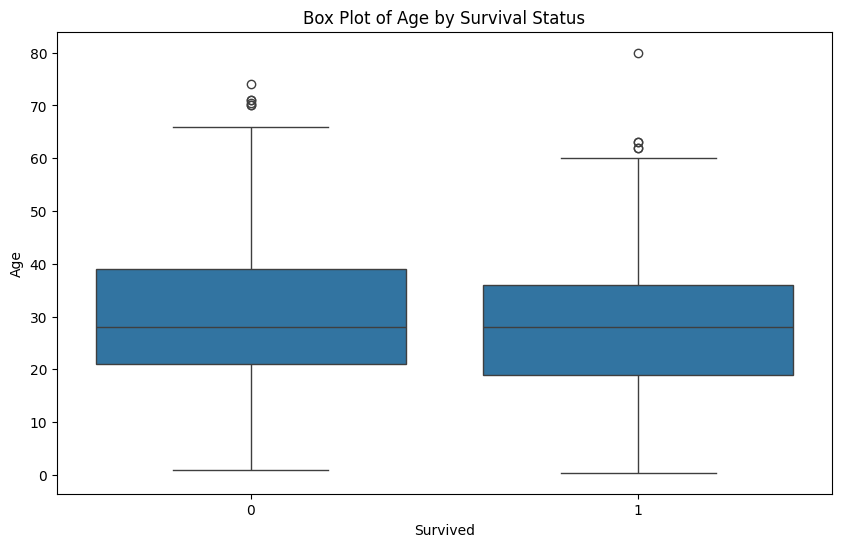

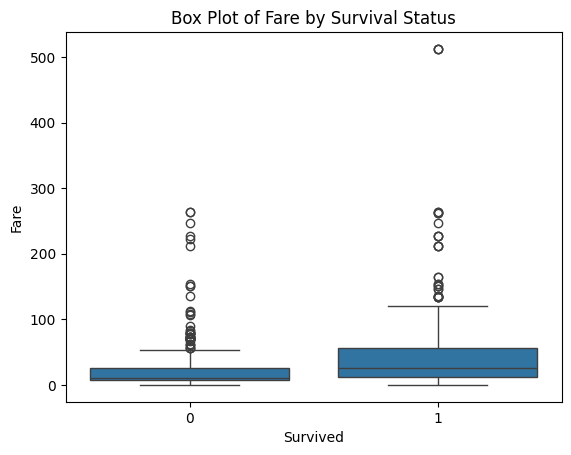

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
for column in ['Age', 'Fare']:
    sns.boxplot(data=df, x='Survived', y=column)
    plt.title(f"Box Plot of {column} by Survival Status")
    plt.show()

### Задание 8

Построить violin plot числовых колонок (исходно числовых, а не кодированных) в зависимости от параметра "Выжил ли человек" и отобразить на одном графике.

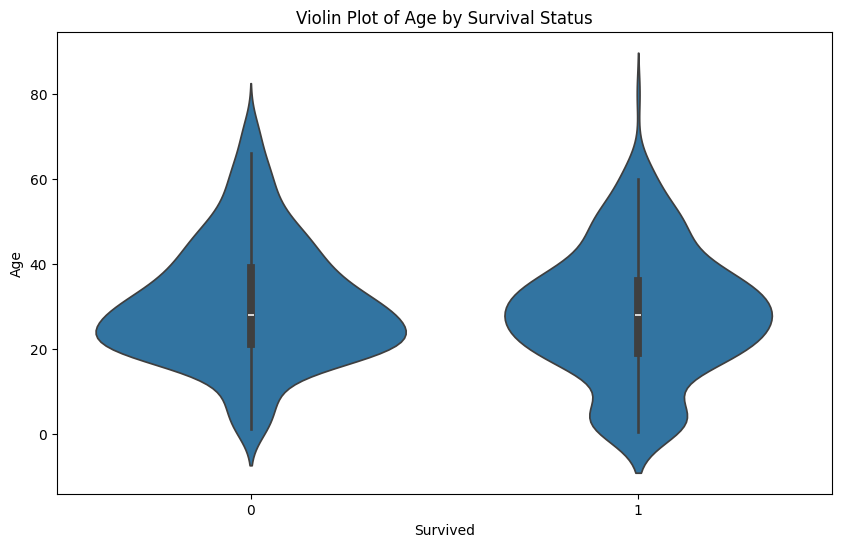

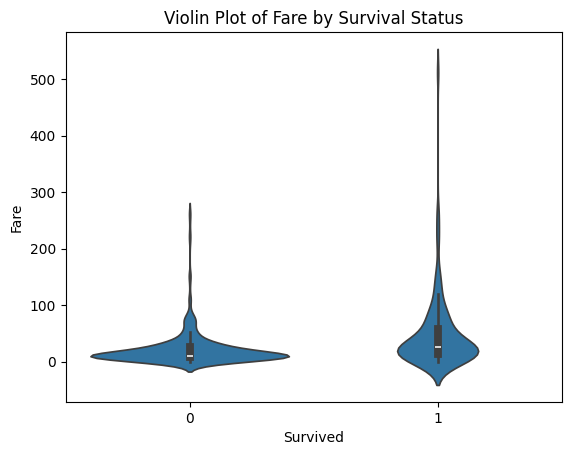

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
for column in ['Age', 'Fare']:
    sns.violinplot(data=df, x='Survived', y=column)
    plt.title(f"Violin Plot of {column} by Survival Status")
    plt.show()

### Задание 9

Какие выводы можно сделать на основе полученных графиков? Опишите тезисно.

*Место для ответа*

### Тепловая карта корреляций

#### Задание 10

Построить тепловую карту корреляций (2 балла из 3).

Какие признаки сильнее всего коррелируют (линейно) с целевой величиной? (1 балл из 3)

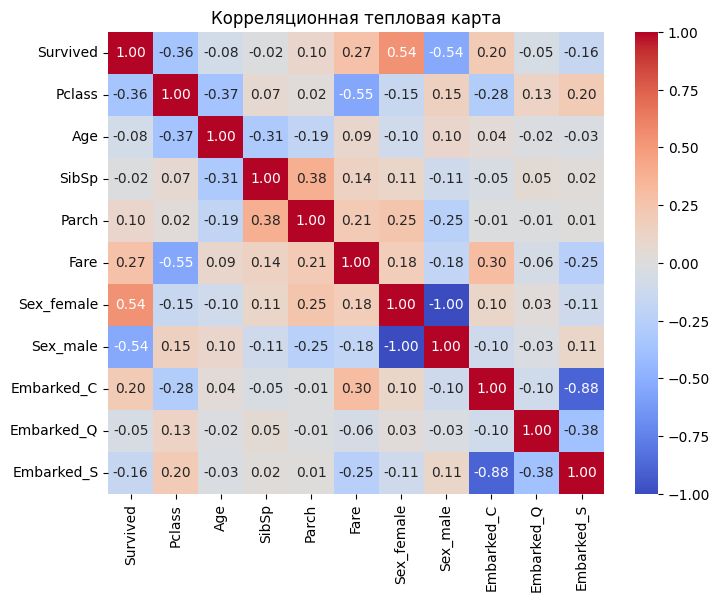

In [ ]:
# Вычисление корреляции
corr_matrix = df_encoded.corr()

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная тепловая карта')
plt.show()

Самакя большая отрицательная корреляция между полом и самая борльшая положительная корреляция *Место для ответа*

### Группировка данных

#### Задание 11

Найдите долю выживших и погибших в зависимости от класса каюты (долю выживших от всех выживших и долю погибших от всех погибших).

In [ ]:
class_survival = df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Class:\n", class_survival)

Survival Rate by Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


#### Задание 12

Найдите долю выживших и погибших в зависимости от пола (долю выживших от всех выживших и долю погибших от всех погибших).

In [ ]:
gender_survival = df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:\n", gender_survival)

Survival Rate by Gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


#### Задание 13

Какие выводы можно сделать из полученных таблиц и приведенной ниже визуализации? Опишите тезисно.

*Место для ответа*